# Experimenting with Audio Feature Extraction

In [1]:
import librosa
import matplotlib.pyplot as plt
import torch
import torchaudio

from python_speech_features import mfcc
from python_speech_features import delta
from python_speech_features import logfbank
from transformers import WhisperFeatureExtractor

In [2]:
audio_sample_path = '../../mscw/common_voice_en_10504.opus'

## Method 1 - WhisperFeatureExtractor

[Documentation of HuggingFace WhisperFeatureExtractor](https://huggingface.co/docs/transformers/model_doc/whisper#transformers.WhisperFeatureExtractor)

In [3]:
def get_audio_features(file):
    '''This function takes in a file path and a size and returns a spectrogram of the audio file.
    file: path to the audio file (.opus)
    '''
    audio, sr = librosa.load(file, sr=16000) # load audio file
    feature_extractor = WhisperFeatureExtractor(feature_size=40) # initialize feature extractor
    features = feature_extractor(audio, sampling_rate=sr, return_tensors="pt") # extract features
    spectrogram = features['input_features'][0] # get spectrogram
    spectrogram = spectrogram[:, :100] # crop spectrogram
    return spectrogram

In [4]:
def plot_spectrogram(spectrogram):
    '''This function takes in a spectrogram and plots it.'''
    plt.imshow(spectrogram, aspect='auto', origin='lower')
    plt.colorbar()
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.show()

In [5]:
get_audio_features(audio_sample_path).shape

torch.Size([40, 100])

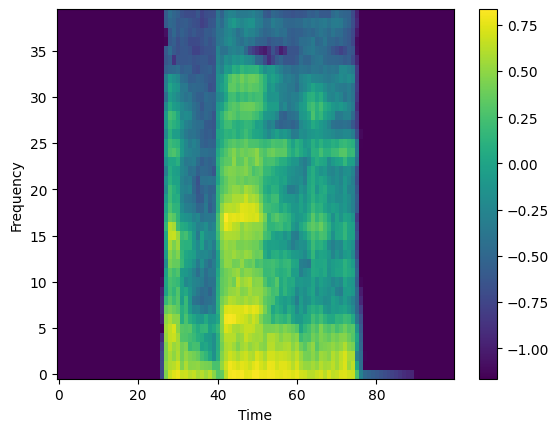

In [6]:
plot_spectrogram(get_audio_features(audio_sample_path))

## Method 2 - Python Speech Features

In [7]:
def generate_speech_features_from_opus(opus_file):
    """This function generates the speech features in the numpy array from an opus file:
    Args:
        opus_file (str): The path of the opus file
    Returns:
        numpy.ndarray: The generated speech features
    """
    # Get the signal and sample rate from an opus file
    sig, rate = librosa.load(opus_file)

    # Compute the MFCC features from signal and sample rate
    mfcc_feat = mfcc(sig,rate)
    
    # Compute delta features from MFCC
    d_mfcc_feat = delta(mfcc_feat, 2)
    
    # Compute log Mel-filterbank energy features 
    fbank_feat = logfbank(sig,rate)
    
    return fbank_feat, d_mfcc_feat

In [8]:
generate_speech_features_from_opus(audio_sample_path)[0].shape

(99, 26)

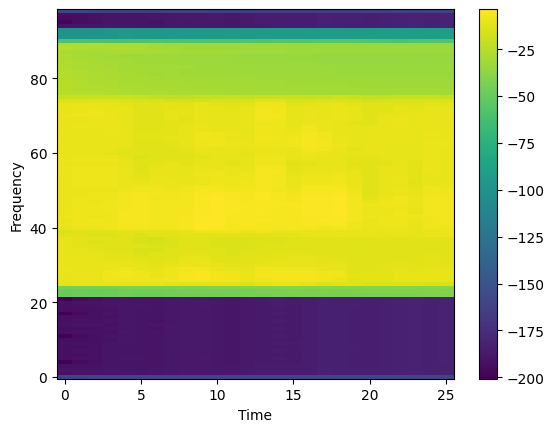

In [9]:
plot_spectrogram(generate_speech_features_from_opus(audio_sample_path)[0])

In [10]:
generate_speech_features_from_opus(audio_sample_path)[1].shape

(99, 13)

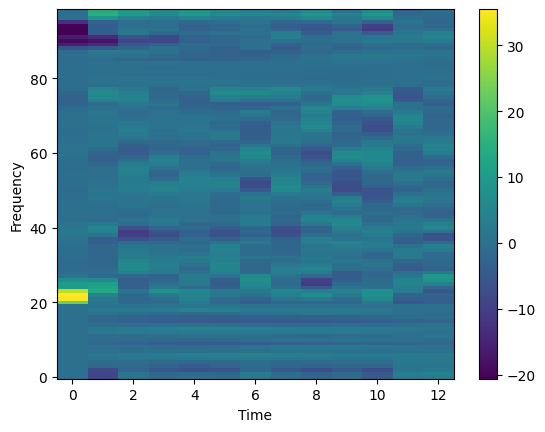

In [11]:
plot_spectrogram(generate_speech_features_from_opus(audio_sample_path)[1])

## Method 3 - torchaudio (a)

In [12]:
def plot_specgram(waveform, sample_rate, title="Spectrogram"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)
    plt.show(block=False)

In [13]:
waveform, sample_rate = torchaudio.load(audio_sample_path)

In [14]:
waveform.shape

torch.Size([1, 48000])

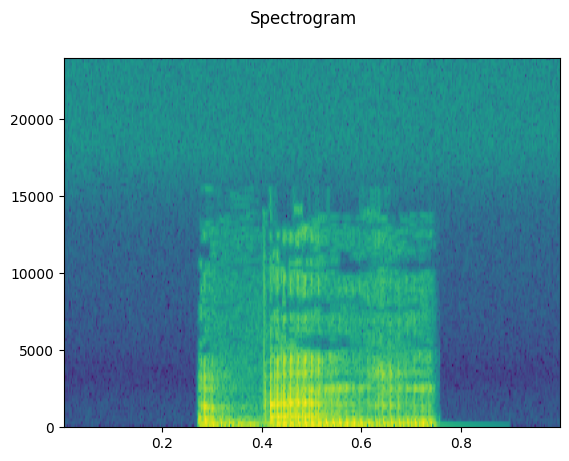

In [15]:
plot_specgram(waveform, sample_rate)

## Method 4 - torchaudio (b)

In [16]:
def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto")
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

In [17]:
waveform, sample_rate = torchaudio.load(audio_sample_path, normalize=True,)
transform = torchaudio.transforms.Spectrogram(center=True,win_length=None)
spectrogram = transform(waveform)

In [18]:
spectrogram[0].shape

torch.Size([201, 241])

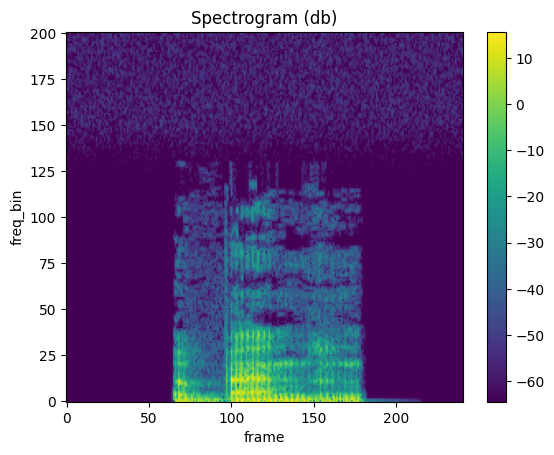

In [19]:
plot_spectrogram(spectrogram[0])